In [21]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

In [22]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [23]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [24]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [25]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


columns_to_scale = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]

data_to_scale = df_market_data[columns_to_scale]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

In [26]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Set the coinid column as index
scaled_df = scaled_df.set_index(df_market_data.index)

# Display sample data
print(scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [72]:
# Create a list with the number of k-values from 1 to 11

k_values1 = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [73]:
# Create an empty list to store the inertia values
os.environ["OMP_NUM_THREADS"] = "1"
inertia1 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(scaled_data)
    inertia.append(model.inertia_)


C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

In [29]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

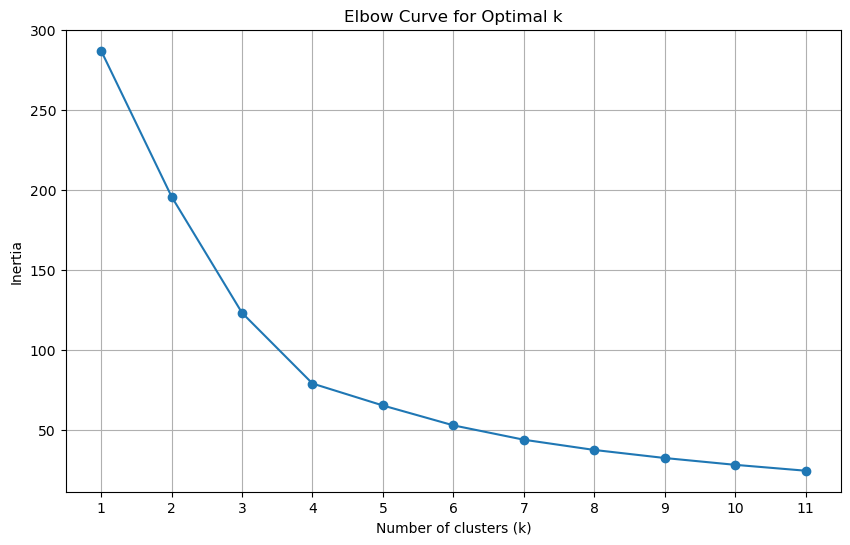

In [30]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt
elbow_df = pd.DataFrame(elbow_data)

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 1

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [31]:
# Initialize the K-Means model using the best value for k

optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)


In [32]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data)


C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [33]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(scaled_data)

# Print the resulting array of cluster values.
print("Cluster Values:", clusters)

Cluster Values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [44]:
# Create a copy of the DataFrame
scaled_data_with_clusters = scaled_data.copy()


In [46]:
# Add a new column to the DataFrame with the predicted clusters

if not isinstance(scaled_data_with_clusters, pd.DataFrame):
    scaled_data_with_clusters = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Now try adding the clusters array as a new column
scaled_data_with_clusters['Clusters'] = clusters

# Display the first few rows
print(scaled_data_with_clusters.head())

   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                     0.008005                     -0.55

In [47]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas

scatter_plot = scaled_data_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Clusters',
    hover_cols=['coin_id'],  
    colormap='Category10',
    width=800,
    height=400
)

scatter_plot

:NdOverlay   [Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [48]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [49]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(scaled_data_with_clusters)

pca_df = pd.DataFrame(
    pca_data, 
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'],
    index=scaled_data_with_clusters.index  # Maintaining the same index woo!
)

# View the first five rows of the DataFrame. 
print(pca_df.head())

   Principal Component 1  Principal Component 2  Principal Component 3
0              -0.458737               0.929075               0.462762
1              -0.386833               0.525089               0.952970
2              -0.457751              -0.090974              -0.644363
3              -0.504507              -0.137660              -0.482747
4              -0.808014               2.202362               1.861748


In [50]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.2f}")

Principal Component 1: 0.38
Principal Component 2: 0.34
Principal Component 3: 0.17


In [ ]:
#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89

In [53]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
pca_df['crypto_names'] = df_market_data['coin_id']

# Set the coinid column as index
pca_df = pca_df.set_index(df_market_data['coin_id'])

# Display sample data
print(pca.df.head())

KeyError: 'coin_id'

---

### Find the Best Value for k Using the PCA Data

In [74]:
# Create a list with the number of k-values from 1 to 11
k_values2 = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [75]:
# Create an empty list to store the inertia values
os.environ["OMP_NUM_THREADS"] = "1"
inertia_list2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    inertia_list.append(kmeans.inertia_)

C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [78]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values2, 'inertia': inertia_list2}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


ValueError: All arrays must be of the same length

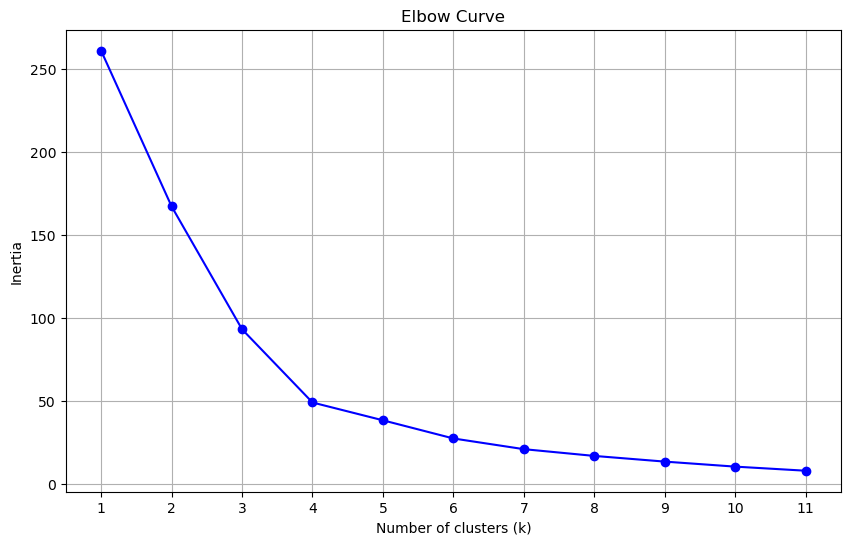

In [77]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()


In [ ]:
#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 4, I believe!

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [62]:
# Initialize the K-Means model using the best value for k
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=0)

In [63]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Drenaline\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [64]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = kmeans_model.predict(pca_df)
# Print the resulting array of cluster values.
print("Cluster Assignments:", cluster_predictions)

Cluster Assignments: [0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [66]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_with_clusters['Clusters'] = cluster_predictions

# Display sample data
print(df_pca_with_clusters.head())

   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.458737               0.929075               0.462762   
1              -0.386833               0.525089               0.952970   
2              -0.457751              -0.090974              -0.644363   
3              -0.504507              -0.137660              -0.482747   
4              -0.808014               2.202362               1.861748   

   Clusters  
0         0  
1         0  
2         3  
3         3  
4         0  


In [71]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. (I spelled them out instead I just prefer that)
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    by='Clusters',
    hover_cols=['coin_id'],  
    colormap='Category10',
    width=800,
    height=400
)

scatter_plot


:NdOverlay   [Clusters]
   :Scatter   [Principal Component 1]   (Principal Component 2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [82]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

k_values1 = list(range(1, 12))  # Adjust according to your data
k_values2 = list(range(1, 12))  # Adjust according to your data
inertia_list1 = [inertia_list1]
inertia_list2 = [inertia_list2]

plt.figure(figsize=(10, 6))
plt.plot(k_values1, inertia_list1, marker='o', color='b', label='Scenario 1')
plt.plot(k_values2, inertia_list2, marker='o', color='r', label='Scenario 2')

plt.title('Composite Elbow Curve Comparison')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))  # Adjust the range based on your k-values
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()

NameError: name 'inertia_list1' is not defined

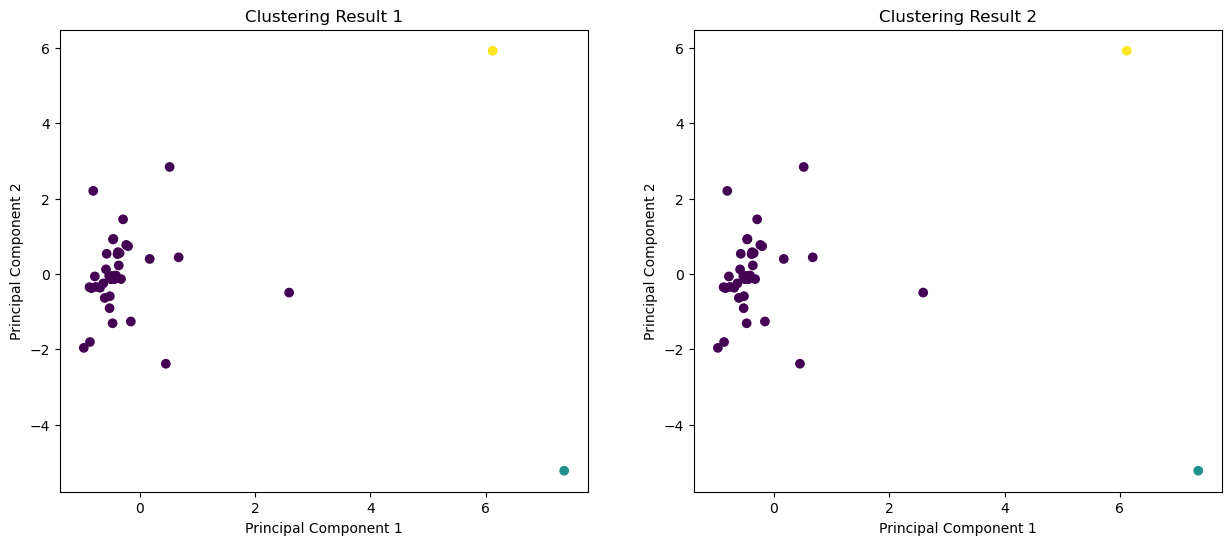

In [86]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the first clustering result
axes[0].scatter(df_pca_with_clusters['Principal Component 1'], df_pca_with_clusters['Principal Component 2'], c=clusters, cmap='viridis', marker='o')
axes[0].set_title('Clustering Result 1')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plotting the second clustering result
axes[1].scatter(df_pca_with_clusters['Principal Component 1'], df_pca_with_clusters['Principal Component 2'], c=clusters, cmap='viridis', marker='o')
axes[1].set_title('Clustering Result 2')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

# Show the plot
plt.show()

In [ ]:
#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** I may be off on this last part and the effect would be there is less sample data though it also makes it more clear with less clutter.